In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean
import numpy as np

In [69]:
binned_neutral_density = pd.read_csv("../../derived_data/binned_neutral_density.csv", index_col = 0)
binned_neutral_density.columns = binned_neutral_density.columns.astype("float") #convert column names from strings to floats
binned_thorpe_eps = pd.read_csv("../../derived_data/binned_thorpe_dissipation.csv", index_col = 0)
binned_thorpe_eps.columns = binned_neutral_density.columns.astype("float") #convert column names from strings to floats
#binned_thorpe_eps

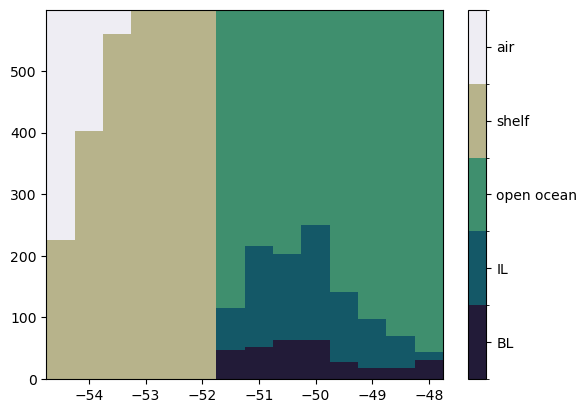

In [70]:
regions_key = {"air":-1, "shelf": 0, "open ocean": 1, "IL":2, "BL":3}
binned_regions = binned_neutral_density.where(cond=binned_neutral_density<28.40, other = regions_key["IL"] )
bottom_density = binned_neutral_density.iloc[0]
grav_curr_bottom_density = bottom_density.where(cond=bottom_density>28.40, other=np.nan)
binned_regions = binned_regions.where(cond=(grav_curr_bottom_density - binned_neutral_density)>0.01, other = regions_key["BL"] )
binned_regions = binned_regions.where(cond=binned_neutral_density > 28.40, other = regions_key["open ocean"] )
# Define the condition for the column names
condition = lambda col_name: col_name > -52
# Create the mask
mask = pd.DataFrame(
    {col: condition(col) for col in binned_regions.columns},  # Check condition on column names
    index=binned_regions.index                                 # Retain the same index
)
binned_regions = binned_regions.where(cond=mask, other = regions_key["shelf"])
binned_regions = binned_regions.where(cond=~binned_neutral_density.isna(), other = regions_key["air"] )
binned_regions = binned_regions.iloc[0:600]
levels = np.arange(-1.5,4.5,1)
plt.pcolormesh(
    binned_regions.columns,
    binned_regions.index,
    binned_regions.values,
    norm = mcolors.BoundaryNorm(levels, ncolors = 256),
    cmap = cmocean.cm.rain
)
cbar = plt.colorbar(ticks = list(regions_key.values()))
cbar.set_ticks(ticks =list(regions_key.values()), labels = list(regions_key.keys()))
cbar.ax.invert_yaxis()

In [71]:
binned_regions.columns

Index([-54.5, -54.0, -53.5, -53.0, -52.5, -52.0, -51.5, -51.0, -50.5, -50.0,
       -49.5, -49.0, -48.5, -48.0],
      dtype='float64')

In [75]:
binned_finestructure_dissipation = pd.read_csv("../../derived_data/binned_finestructure_dissipation.csv", index_col = 0)
binned_finestructure_dissipation.columns = binned_finestructure_dissipation.columns.astype("float") #convert column names from strings to floats
binned_finestructure_dissipation

,-54.5,-54.0,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0
62.0,NaN,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10
187.0,NaN,7.965103e-10,3.283406e-09,5.233763e-09,4.960701e-09,2.193591e-09,2.614172e-09,5.192939e-10,1.780772e-09,1.851746e-09,3.757822e-10,3.977511e-10,6.727422e-11,1.144524e-10
312.0,NaN,NaN,6.574537e-09,2.531349e-08,8.665921e-09,1.403223e-08,2.561817e-09,2.971783e-10,7.438957e-10,1.357557e-09,2.718102e-10,1.126462e-09,1.370712e-10,4.333585e-10
437.0,NaN,NaN,7.340639e-09,4.820197e-09,1.765682e-09,2.966885e-09,8.742657e-10,2.855886e-10,4.448810e-10,2.125415e-09,1.223184e-10,1.076213e-10,6.303895e-11,1.467980e-10
562.0,NaN,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11
687.0,NaN,NaN,NaN,NaN,1.004293e-09,1.205745e-09,1.401286e-10,1.125506e-10,1.657022e-09,1.693173e-10,1.060552e-10,1.075313e-10,3.658712e-10,1.389623e-10
812.0,NaN,NaN,NaN,NaN,1.746722e-09,4.756469e-10,1.895544e-10,8.625258e-11,2.014742e-10,1.308777e-10,8.394655e-11,1.408937e-10,5.865811e-11,1.584224e-10
937.0,NaN,NaN,NaN,NaN,6.822171e-09,1.758239e-09,1.325279e-10,5.298657e-11,8.580288e-11,9.788567e-11,1.274525e-10,3.126898e-11,3.774693e-11,3.068772e-10
1062.0,NaN,NaN,NaN,NaN,1.275646e-08,5.488914e-10,1.915403e-10,1.079955e-10,1.020174e-10,2.235828e-10,5.694546e-11,7.499811e-11,2.372984e-11,1.178414e-10
1187.0,NaN,NaN,NaN,NaN,2.928122e-09,6.022726e-09,2.499868e-10,1.720492e-10,2.474127e-10,2.743348e-10,8.987654e-11,5.694680e-11,7.049973e-11,8.270553e-11


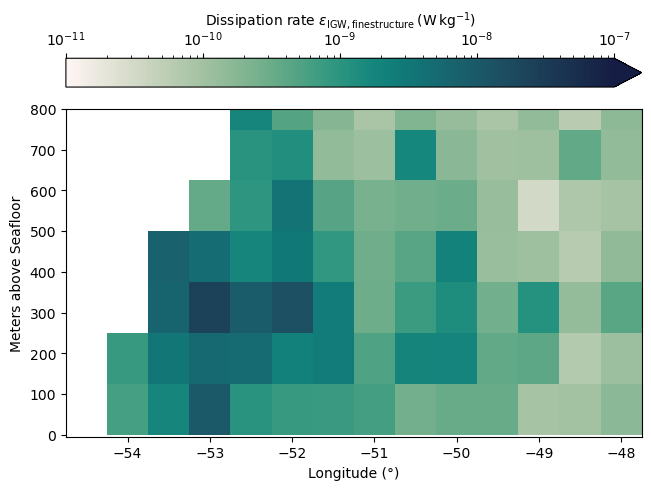

In [76]:
fig, ax = plt.subplots(1, layout = "constrained")
cmap = cmocean.cm.tempo
mpp = ax.pcolormesh(
    binned_finestructure_dissipation.columns, 
    binned_finestructure_dissipation.index, 
    binned_finestructure_dissipation,
    norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
    cmap=cmap,
)
ax.set_ylim(-5,800)
cb = plt.colorbar(mpp, ax=ax, location="top", extend = "max")
cb.set_label(r"Dissipation rate $\varepsilon_{\mathrm{IGW, finestructure}}\,$(W$\,$kg$^{-1}$)")
#draw_water_mass_boundaries(ax)
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Meters above Seafloor");

In [77]:
hires_finestructure = binned_finestructure_dissipation.iloc[:6].reindex(index = binned_regions.index, method = "nearest")

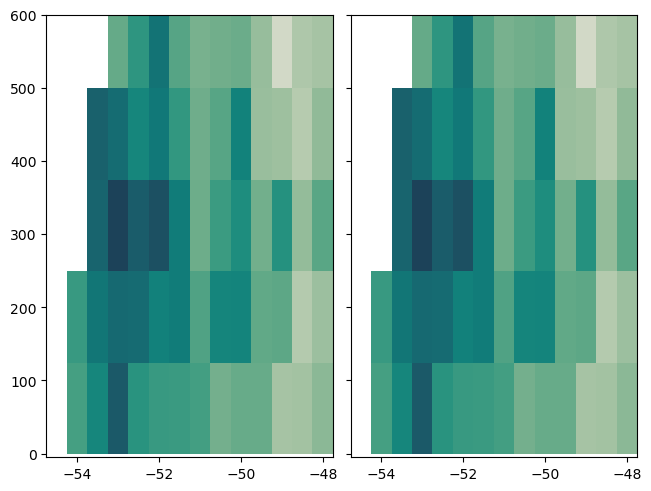

In [78]:
fig, ax = plt.subplots(ncols = 2, layout = "constrained", sharey = True, sharex = True)
cmap = cmocean.cm.tempo
mpp = ax[0].pcolormesh(
    binned_finestructure_dissipation.columns, 
    binned_finestructure_dissipation.index, 
    binned_finestructure_dissipation,
    norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
    cmap=cmap,
)
ax[0].set_ylim(-5,600)
#cb = plt.colorbar(mpp, ax=ax, location="top", extend = "max")
#cb.set_label(r"Dissipation rate $\varepsilon_{\mathrm{IGW, finestructure}}\,$(W$\,$kg$^{-1}$)")
#draw_water_mass_boundaries(ax)
#ax.set_xlabel("Longitude (°)")
#ax.set_ylabel("Meters above Seafloor");
mpp = ax[1].pcolormesh(
    hires_finestructure.columns, 
    hires_finestructure.index, 
    hires_finestructure,
    norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
    cmap=cmap,
)

In [79]:
hires_finestructure

,-54.5,-54.0,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0
0,NaN,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10
1,NaN,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10
2,NaN,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10
3,NaN,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10
4,NaN,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,NaN,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11
596,NaN,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11
597,NaN,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11
598,NaN,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11


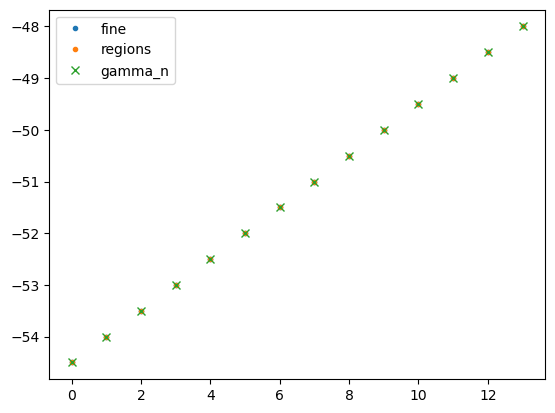

In [80]:
plt.plot(hires_finestructure.columns,".", label = "fine")
plt.plot(binned_regions.columns,".", label = "regions")
plt.plot(binned_neutral_density.columns,"x", label = "gamma_n")
plt.legend()

air nan
shelf 5.2e-09
open ocean 5.8e-10
IL 7.4e-10
BL 3.9e-10


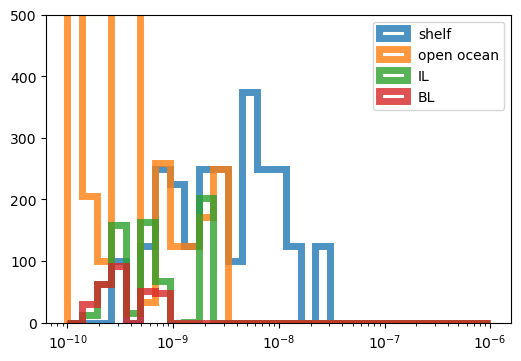

In [82]:
hires_finestructure
assert hires_finestructure.shape == binned_regions.shape
assert np.all(hires_finestructure.index == binned_regions.index)
logbins = np.logspace(-10, -6, 30)
fig, ax = plt.subplots(1, figsize = (6,4))
for name, number in regions_key.items():
    mean_eps = hires_finestructure[binned_regions == number].mean(axis = None)
    #std_eps = np.nanstd(binned_thorpe_eps[binned_regions == number].values)
    print(name, f"{mean_eps:.1e}") #+- {std_eps:.1e}")
    data = hires_finestructure[binned_regions == number].values.flatten()
    data = data[~np.isnan(data)]
    #print(data)
    if name == "air": continue
    #weights = np.ones_like(data)/float(len(data))
    ax.hist(data, bins = logbins, label = name, alpha = 0.8, histtype = "step", lw = 5)
plt.xscale('log')    
plt.gca().set_ylim(0,500)  
plt.legend();